In [1]:
from google.colab import drive
import torch
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DepthSense

Mounted at /content/drive
/content/drive/MyDrive/DepthSense


In [21]:
best_epoch

4

In [23]:
from ResnetFF import ResnetFF
model = ResnetFF()
best_sd = torch.load('ResnetFF.pt')
model.load_state_dict(best_sd)


<All keys matched successfully>

  0%|          | 0/10 [00:00<?, ?it/s]

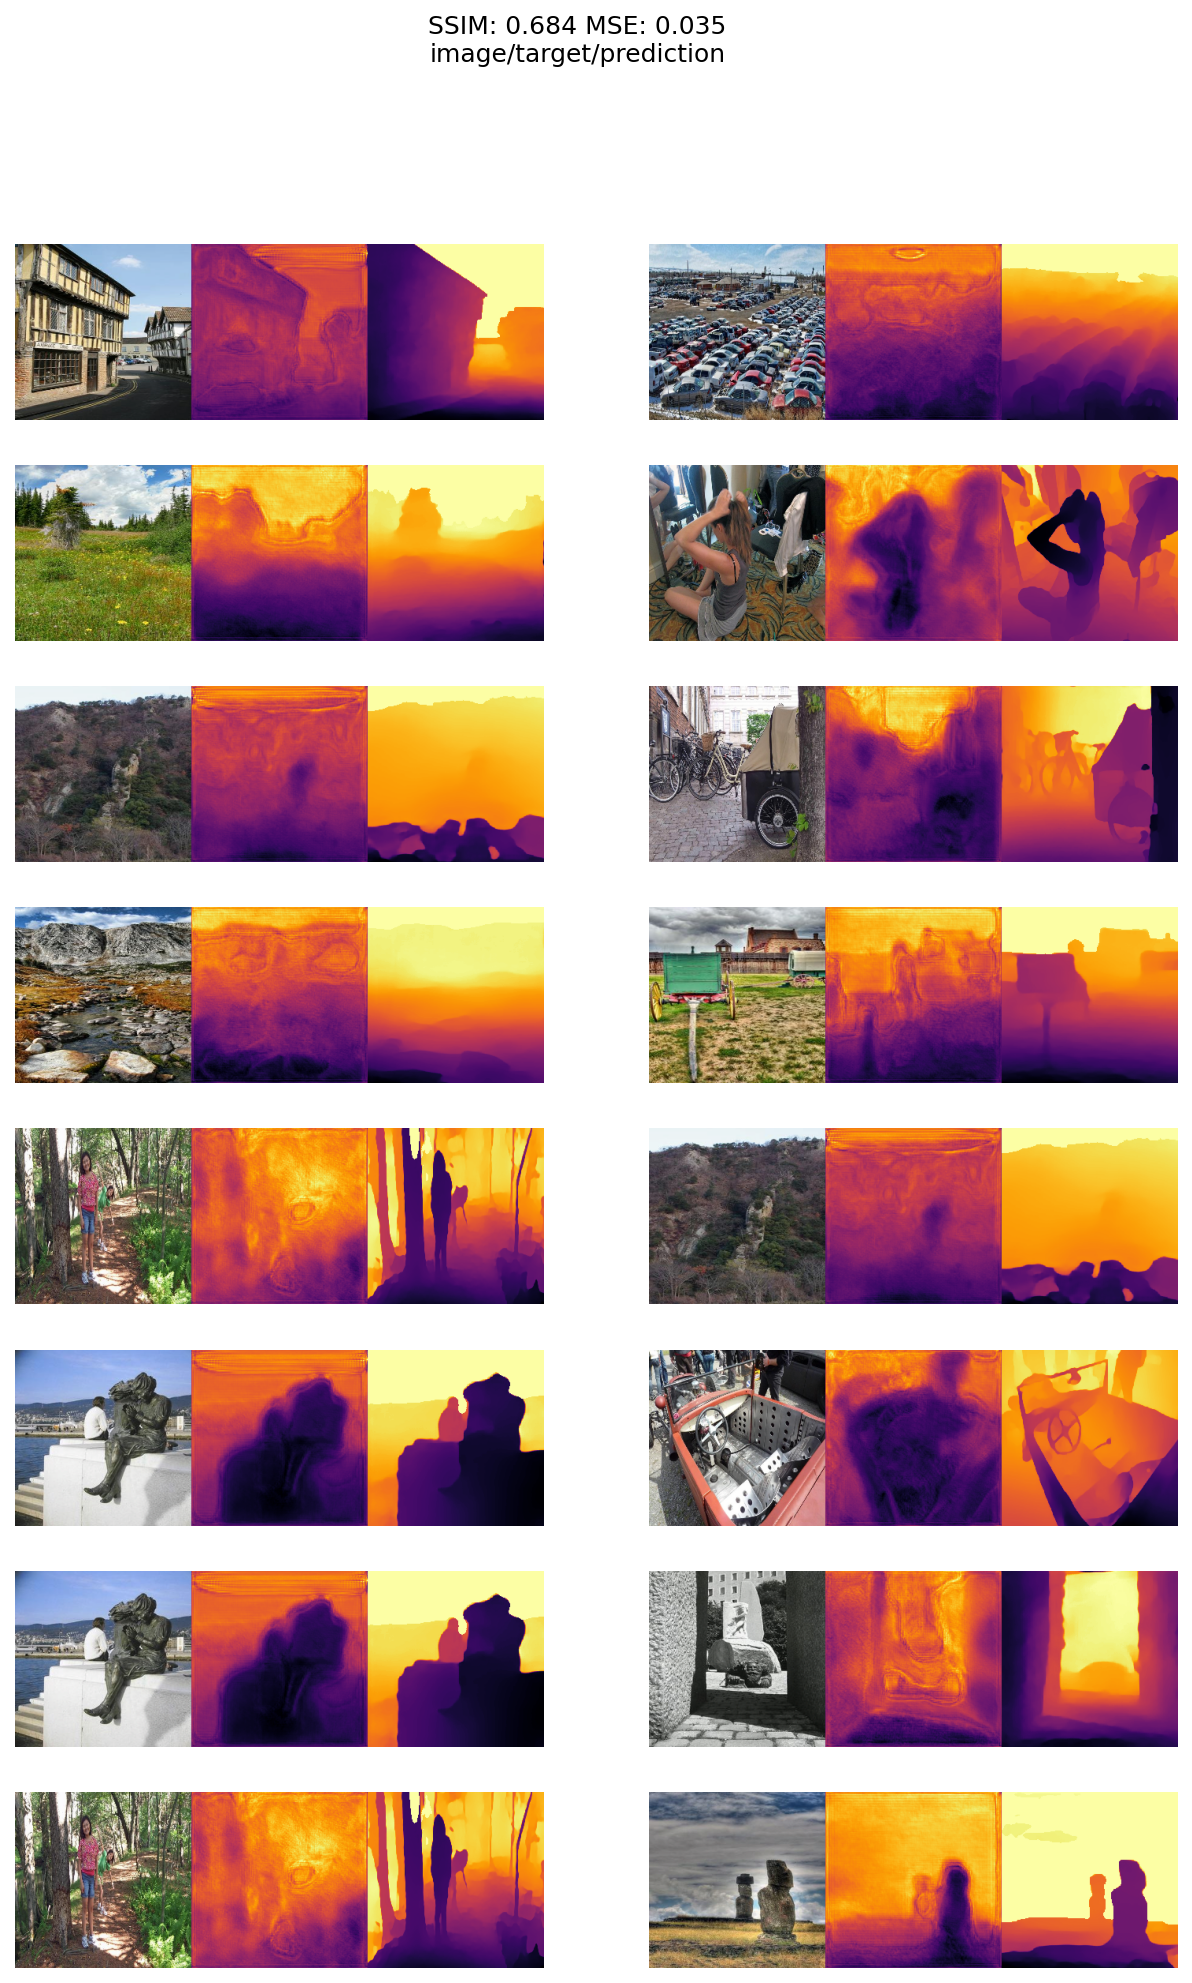

In [24]:
all_imgs, all_preds, all_targets = [], [], []
with torch.no_grad():
    with autocast():
        for img, mask in tqdm(test_dl,total=len(test_dl)):
            img, mask = img.to(device), mask.to(device)
            preds = model(img)
            all_imgs.append(img)
            all_preds.append(preds)
            all_targets.append(mask)

test_metrics = metrics.clone()
test_metrics(
    torch.vstack(all_preds),
    torch.vstack(all_targets)
)
m = test_metrics.compute()
title = f"SSIM: {m['StructuralSimilarityIndexMeasure'].cpu().item():.3f} MSE: {m['MeanSquaredError'].cpu().item():.3f}"
plot_vals(
    torch.vstack(all_imgs).cpu(),
    torch.vstack(all_preds).cpu(),
    torch.vstack(all_targets).cpu(),
    n=16,
    figsize=(10,15),
    title=title
)



In [25]:
logs

,loss_train,loss_val,ssim_train,ssim_val,mse_train,mse_val
0,0.327318,0.2071,0.133579,0.425158,0.327318,0.20583
1,0.050247,0.042086,0.58262,0.608989,0.050247,0.041778
2,0.054153,0.047912,0.647623,0.622574,0.054153,0.047796
3,0.047921,0.039307,0.680513,0.654263,0.047921,0.039069
4,0.043474,0.038338,0.688893,0.655723,0.043474,0.038063


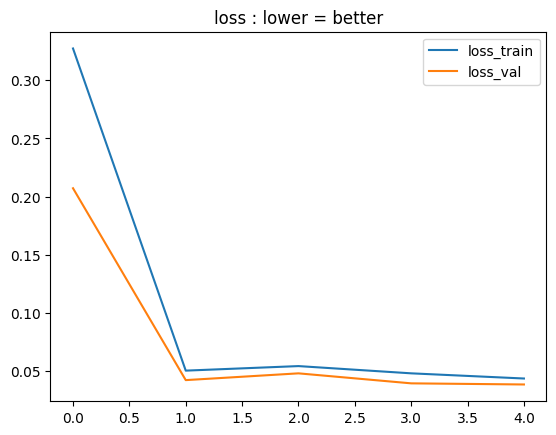

In [26]:
logs['loss_train'].plot()
logs['loss_val'].plot()
plt.title('loss : lower = better')
plt.legend()
plt.show()

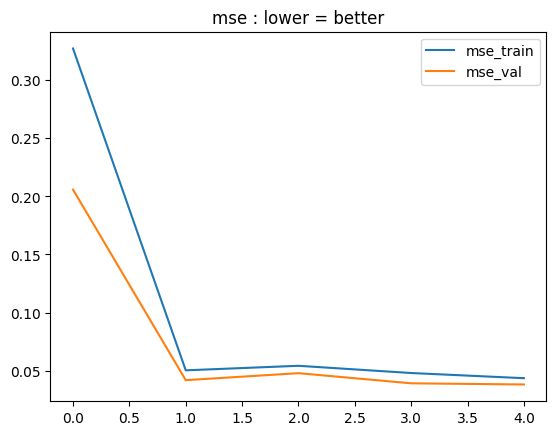

In [27]:
logs['mse_train'].plot()
logs['mse_val'].plot()
plt.title('mse : lower = better')
plt.legend()
plt.show()

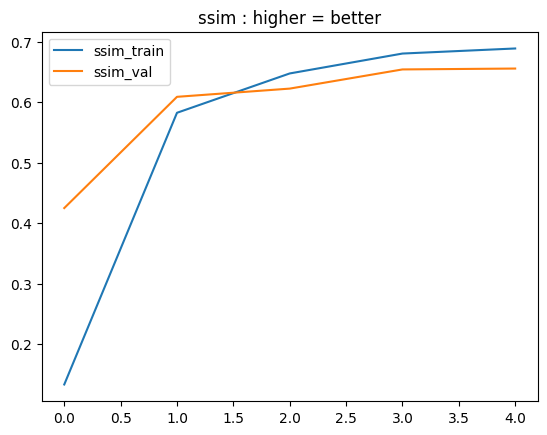

In [28]:
logs['ssim_train'].plot()
logs['ssim_val'].plot()
plt.title('ssim : higher = better')
plt.legend()
plt.show()